In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#%matplotlib
%matplotlib notebook

In [2]:
# ,lineterminator='\n'
data = pd.read_csv('ProShop_Zalando_test.csv')
data.head(10)

,rating,review
0,__label__5,super service har handlet flere gange har al...
1,__label__1,kan kun give em stjerne for dette købsforløb. ...
2,__label__5,fem stjerner for at lytte til en klage. jeg re...
3,__label__4,de ting der blev leveret var ok leveringsti...
4,__label__5,proshop havde bedste pris på det ønskede produ...
5,__label__5,god pris!! hurtig og præcis levering. varen ok.
6,__label__5,godt udvalg gode priser og varerne kom dagen ...
7,__label__5,hurtig og effektiv leverig. varer som bestilt.
8,__label__5,fedt med så hurtig en levering
9,__label__5,proshop skuffer aldrig!bestilte en vare fredag...


In [3]:
import fasttext

model = fasttext.train_supervised('ProShop_Zalando_test.csv')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(str(x)))

In [4]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9998096823692322, '(stradivarius'),
 (0.9998096823692322, 'produktfejl'),
 (0.9998096823692322, 'purple).'),
 (0.9998096823692322, 'punge'),
 (0.9998096823692322, 'produktfejlen'),
 (0.9998096823692322, 'dark'),
 (0.9998096823692322, 'pungen.'),
 (0.9998096823692322, 'chipper.'),
 (0.9998096823692322, 'macther'),
 (0.9998096823692322, 'medarbejderne.')]

In [5]:
model.get_nearest_neighbors('utilfreds')

[(0.93648362159729, 'vide'),
 (0.9351284503936768, 'modtaget'),
 (0.9336121678352356, 'nyborg'),
 (0.9334335923194885, 'nu..............'),
 (0.9334086179733276, 'skuffelsesidste'),
 (0.9334063529968262, 'ledelse'),
 (0.9334033131599426, 'ikke'),
 (0.9334018230438232, 'lovs'),
 (0.9333983063697815, 'alarmen.'),
 (0.9333937168121338, 'dem!!!pas')]

In [6]:
model.get_nearest_neighbors('glad')

[(0.9945857524871826, 'størelse/materiale/pris/shipping.'),
 (0.9945693612098694, 'vasken'),
 (0.9945693612098694, 'tøjstørrelser.'),
 (0.9945647120475769, 'brugerkontoen'),
 (0.9945647120475769, 'genereret'),
 (0.9945647120475769, 'ordrelisten'),
 (0.9945647120475769, 'modtagelsen.'),
 (0.9945647120475769, 'resulter'),
 (0.9945647120475769, 'brugerkonto'),
 (0.9945644736289978, 'demovarer.')]

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [8]:
print(data['cluster'].value_counts())

1    2888
3    1676
0    1472
4     843
2     348
Name: cluster, dtype: int64


In [9]:
print(model.labels)

['__label__5', '__label__1', '__label__4', '__label__2', '__label__3']


In [10]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[1472 2888  348 1676  843]


array([2888, 1676, 1472,  843,  348])

In [11]:
data['rating'].value_counts(ascending=False)

__label__5     3923
__label__1     2291
__label__4      432
__label__2      363
__label__3      218
Name: rating, dtype: int64

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [13]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

<IPython.core.display.Javascript object>


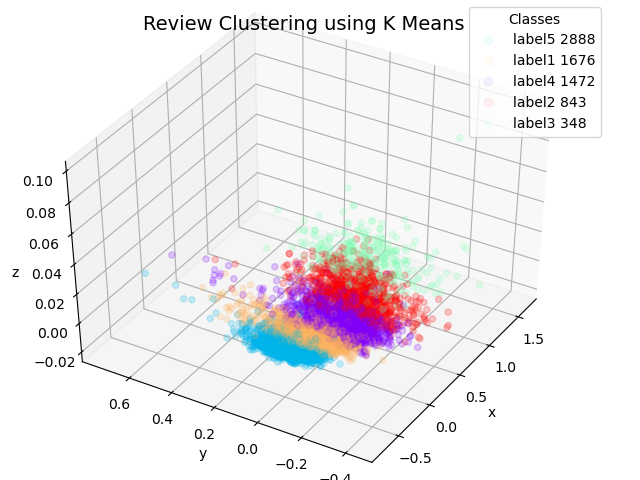

1    2888
3    1676
0    1472
4     843
2     348
Name: cluster, dtype: int64


In [14]:
scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.05)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
print(data['cluster'].value_counts())
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])
